# Assignment 4 Project

## 1. Region and Domain

* Fairfax, VA
* Columbus, Ohio

Domain: Weather phenomena

## 2. Research question

How is the daily temperature in Fairfax, VA correlates with daily temperature in Columbus, Ohio?

## 3. Links
Both the daily maximum temperature file and daily minimum temperature file can be accessed through Data.gov (https://catalog.data.gov/dataset/u-s-daily-climate-normals-1981-2010). The specific links to the files are:
* ftp://ftp.ncdc.noaa.gov/pub/data/normals/1981-2010/products/temperature/dly-tmax-normal.txt
* ftp://ftp.ncdc.noaa.gov/pub/data/normals/1981-2010/products/temperature/dly-tmin-normal.txt

## 4. Image

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
tmax_data = np.loadtxt('dly-tmax-normal.txt', dtype=object)
tmin_data = np.loadtxt('dly-tmin-normal.txt', dtype=object)
tmax_data = pd.DataFrame(tmax_data)
tmin_data = pd.DataFrame(tmin_data)

In [19]:
fairfax_code = 'USC00392822'
columbus_code = 'USW00014821'

In [39]:
fairfax_max = tmax_data.loc[tmax_data.iloc[:, 0] == fairfax_code, 2:]
fairfax_min = tmin_data.loc[tmin_data.iloc[:, 0] == fairfax_code, 2:]
columbus_max = tmax_data.loc[tmax_data.iloc[:, 0] == columbus_code, 2:]
columbus_min = tmin_data.loc[tmin_data.iloc[:, 0] == columbus_code, 2:]

In [55]:
def getDailyData(df):
    d = df.applymap(lambda x: x[:-1]).astype(float)
    d = d.applymap(lambda x: x/10)
    d = d.as_matrix().flatten()
    d = np.delete(d, np.where(d == -88.8))
    return d

In [58]:
f_max = getDailyData(fairfax_max)
f_min = getDailyData(fairfax_min)
c_max = getDailyData(columbus_max)
c_min = getDailyData(columbus_min)

<IPython.core.display.Javascript object>


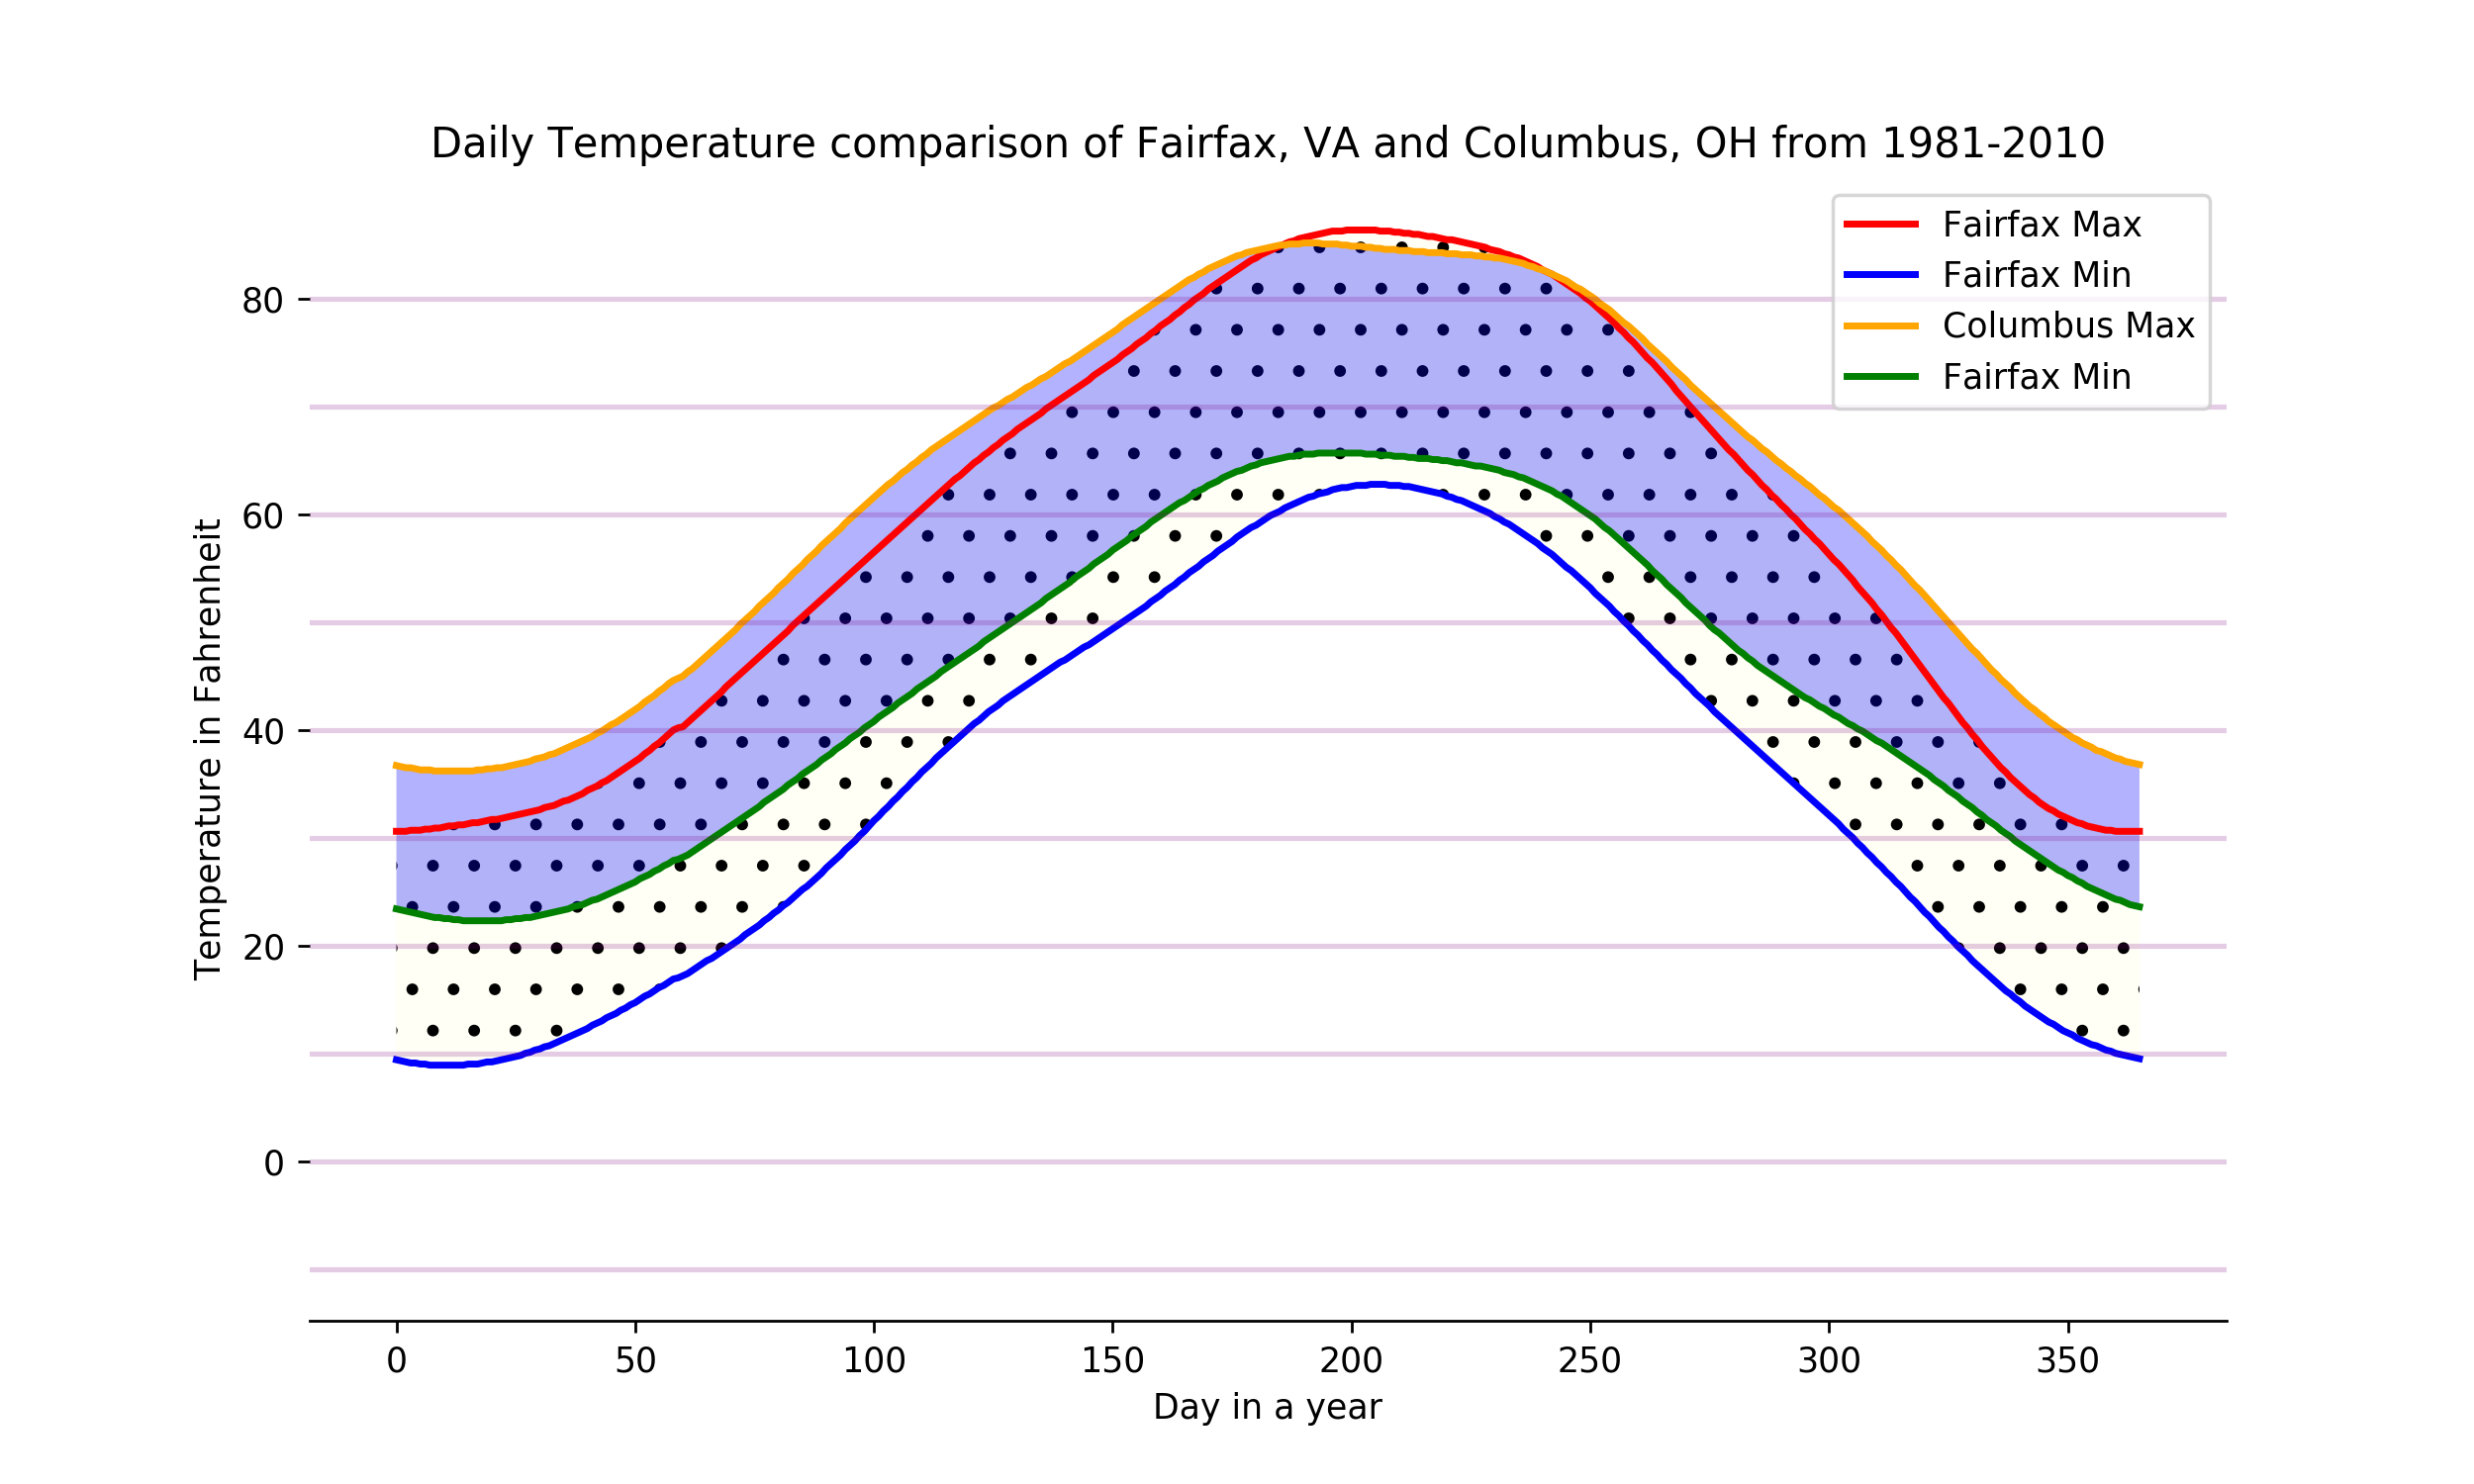

In [104]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
ax.plot(np.arange(f_max.shape[0]), f_max, c='red', linewidth=2, label='Fairfax Max')
ax.plot(np.arange(f_min.shape[0]), f_min, c='blue', linewidth=2, label='Fairfax Min')
ax.plot(np.arange(c_max.shape[0]), c_max, c='orange', linewidth=2, label='Columbus Max')
ax.plot(np.arange(c_min.shape[0]), c_min, c='green', linewidth=2, label='Fairfax Min')
ax.fill_between(np.arange(f_max.shape[0]), f_max, f_min, hatch='.', facecolor='lightyellow', alpha=0.3)
ax.fill_between(np.arange(f_max.shape[0]), c_max, c_min, facecolor='blue', alpha=0.3)
ax.set_title('Daily Temperature comparison of Fairfax, VA and Columbus, OH from 1981-2010')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('Temperature in Fahrenheit')
ax.set_xlabel('Day in a year')
for y in range(-10, 90, 10):
    plt.axhline(y=y, c='purple', alpha=0.2)
ax.legend()
plt.savefig('assignment4.jpg')

## 5. Discussion
I have been living in Columbus Ohio for 2 years before moving to Fairfax Virginia. I noticed that the weather conditions of these two cities are very similar, e.g. if windy in Fairfax then it is very likely that in Columbus it is also windy. Also, the winter feels just cold as in Columbus. So I plotted this graph to show the comparision of daily temperatures in 30 years in these two cities.

The result shows that in average, Columbus has significantly colder winters while in the other seasons, the difference become less significant and Fairfax even shows slightly higher daily temperatures than Columbus in the hottest days. Looking at the area between max and min lines, we can tell that Columbus has slightly less variations of temperatures because the difference between maximum and minimum is less than Fairfax.